In [454]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
netflix=pd.read_csv('C:/Users/kalya/Documents/PycharmProjects/FeatureEngineering/netflix10.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [455]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [456]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [457]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [458]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [459]:
netflix.shape

(8807, 12)

In [460]:
for col in netflix.columns:
    print(col, ":" ,netflix[col].nunique())

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


In [461]:
netflix.drop(columns=['show_id'],inplace=True)

## Univariate

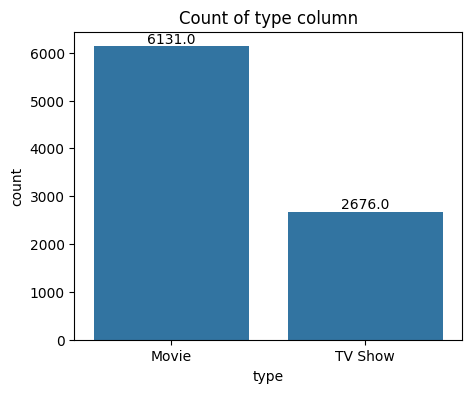

In [462]:
plt.figure(figsize=(5,4)) #figure is like a big land, ax is a single plot(home), p reprsesnts no of rooms in a home(bars)
ax=sns.countplot(x='type',data=netflix)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title("Count of type column")
plt.show()

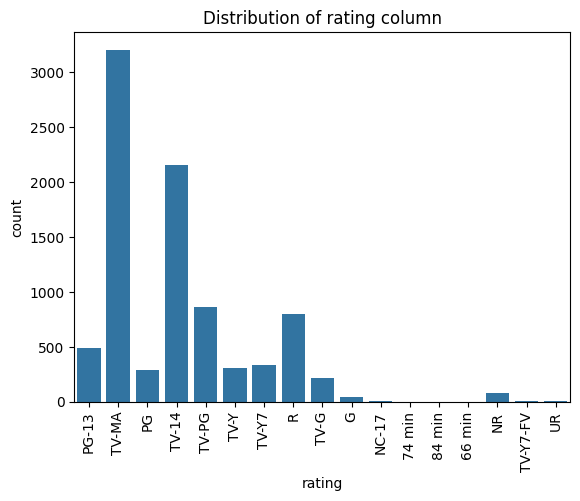

In [463]:
sns.countplot(x='rating',data=netflix)
plt.title("Distribution of rating column")
plt.xticks(rotation=90)
plt.show()

In [464]:
netflix[netflix['rating'].isin(['74 min','84 min','66 min'])] # belown lines executed after seeing duration in rating , so abv graph is re ran

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [465]:
netflix.loc[netflix['rating'].isin(['74 min','84 min','66 min']),'duration']=['74 min','84 min','66 min']

In [466]:
netflix.loc[netflix['rating'].isin(['74 min','84 min','66 min']),'rating']='missing'

In [467]:
netflix.loc[netflix['rating']=='missing']

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,missing,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,missing,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,missing,66 min,Movies,The comic puts his trademark hilarious/thought...


In [468]:
#Observations:
# movie is present more in netflix
#most of the series or movies are for adults ,atleast abv 14
#US,India,UK,japan,South Korea are at the top countries releasing more movies and shows on netflix
#more movies released from 2010 to 2020 is streamed on netflix

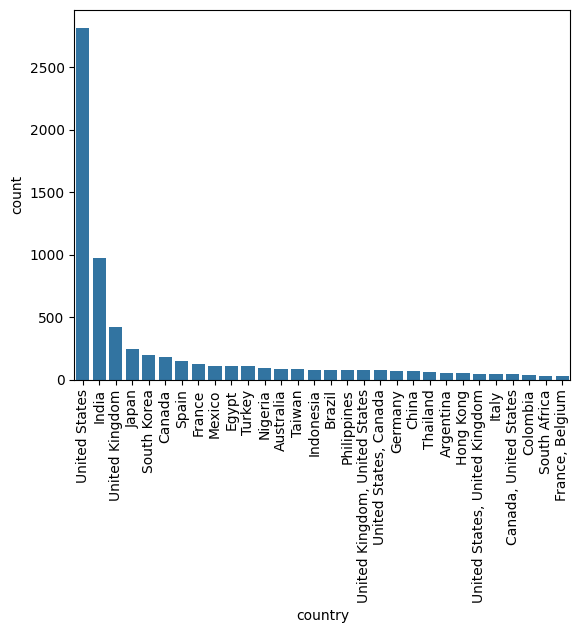

In [469]:
country_data=netflix['country'].value_counts().head(30).reset_index()
country_data
sns.barplot(x='country',y='count',data=country_data)
plt.xticks(rotation=90)
plt.show()

In [470]:
netflix['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

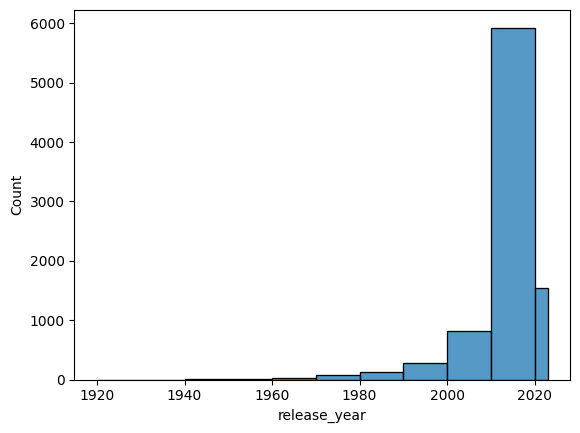

In [471]:
bins=[1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2023]
years = ['1920s','1930s','1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']
sns.histplot(x='release_year',data=netflix,bins=bins,label=years)
plt.show()

In [472]:
netflix['binned_release']=pd.cut(netflix['release_year'],bins=bins,labels=years,right=False)

In [473]:
#to handle nan in date column

date_addedmode=netflix['date_added'].mode()[0]
netflix.loc[netflix['date_added'].isnull(),'date_added']=date_addedmode

In [474]:
netflix[netflix['date_added'].isnull()] #confirm there is no nan in the datetime before parsing but did it
#only at this step,to effect permant use inplace netflix['date_added'].fillna(date_addedmode, inplace=True)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,binned_release


In [475]:
from datetime import datetime
netflix['date_added']=pd.to_datetime(netflix['date_added'],errors='coerce')
netflix['year_added']=netflix['date_added'].dt.year


In [476]:
netflix['year_added'].fillna(0, inplace=True)

In [477]:
netflix['year_added'] = netflix['year_added'].astype('int64')

In [478]:
netflix['year_added'].nunique()

15

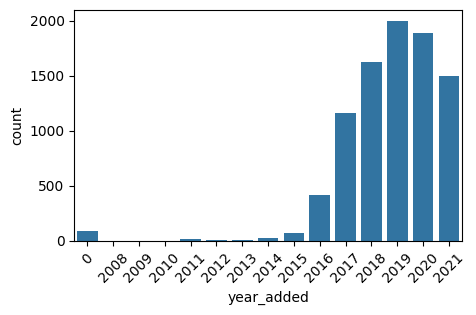

In [479]:
plt.figure(figsize=(5,3))
sns.countplot(x='year_added',data=netflix)
plt.xticks(rotation=45)
plt.show() #netflix was started on 2007.it took 8 years to reach good,2019 was the peak.with pandemic there is a decline in 2020 and 21

In [480]:
netflix.drop(columns=['date_added'],inplace=True)

In [481]:
netflix['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [482]:
# Durations with their corresponding codes
durations_with_codes = {
    # Short (0 to 30 min)
    '13 min': 0, '17 min': 0, '12 min': 0, '15 min': 0, '8 min': 0, '14 min': 0, '9 min': 0,
    '26 min': 0, '20 min': 0, '17 min': 0, '24 min': 0, '22 min': 0, '13 min': 0, '15 min': 0,
    '5 min': 0, '16 min': 0, '17 min': 0, '10 min': 0, '3 min': 0, '18 min': 0, '16 min': 0,
    '11 min': 0, '5 min': 0, '10 min': 0, '11 min': 0, '19 min': 0, '17 min': 0, '18 min': 0,
    '23 min': 0, '25 min': 0, '27 min': 0, '29 min': 0, '28 min': 0,
    # Medium (30 to 60 min)
     '32 min': 1, '31 min': 1,
    '33 min': 1, '34 min': 1, '36 min': 1, '38 min': 1, '37 min': 1, '39 min': 1, '42 min': 1,
    '40 min': 1, '46 min': 1, '45 min': 1, '41 min': 1, '49 min': 1, '47 min': 1, '48 min': 1,
    '50 min': 1, '54 min': 1, '55 min': 1, '51 min': 1, '52 min': 1, '53 min': 1, '59 min': 1,
    '56 min': 1, '57 min': 1, '58 min': 1,
    # Long (1 hr to 5 hr)
    '61 min': 2, '62 min': 2, '63 min': 2, '64 min': 2, '65 min': 2, '66 min': 2, '67 min': 2,
    '68 min': 2, '69 min': 2, '70 min': 2, '71 min': 2, '72 min': 2, '73 min': 2, '74 min': 2,
    '75 min': 2, '76 min': 2, '77 min': 2, '78 min': 2, '79 min': 2, '80 min': 2, '81 min': 2,
    '82 min': 2, '83 min': 2, '84 min': 2, '85 min': 2, '86 min': 2, '87 min': 2, '88 min': 2,
    '89 min': 2, '90 min': 2, '91 min': 2, '92 min': 2, '93 min': 2, '94 min': 2, '95 min': 2,
    '96 min': 2, '97 min': 2, '98 min': 2, '99 min': 2, '100 min': 2, '101 min': 2, '102 min': 2,
    '103 min': 2, '104 min': 2, '105 min': 2, '106 min': 2, '107 min': 2, '108 min': 2, '109 min': 2,
    '110 min': 2, '111 min': 2, '112 min': 2, '113 min': 2, '114 min': 2, '115 min': 2, '116 min': 2,
    '117 min': 2, '118 min': 2, '119 min': 2, '120 min': 2, '121 min': 2, '122 min': 2, '123 min': 2,
    '124 min': 2, '125 min': 2, '126 min': 2, '127 min': 2, '128 min': 2, '129 min': 2, '130 min': 2,
    '131 min': 2, '132 min': 2, '133 min': 2, '134 min': 2, '135 min': 2, '136 min': 2, '137 min': 2,
    '138 min': 2, '139 min': 2, '140 min': 2, '141 min': 2, '142 min': 2, '143 min': 2, '144 min': 2,
    '145 min': 2, '146 min': 2, '147 min': 2, '148 min': 2, '149 min': 2, '150 min': 2, '151 min': 2,
    '152 min': 2, '153 min': 2, '154 min': 2, '155 min': 2, '156 min': 2, '157 min': 2, '158 min': 2,
    '159 min': 2, '160 min': 2, '161 min': 2, '162 min': 2, '163 min': 2, '164 min': 2, '165 min': 2,
    '166 min': 2, '167 min': 2, '168 min': 2, '169 min': 2, '170 min': 2, '171 min': 2, '172 min': 2,
    '173 min': 2, '174 min': 2, '176 min': 2, '177 min': 2, '178 min': 2, '179 min': 2, '180 min': 2,
    '181 min': 2, '182 min': 2, '186 min': 2, '187 min': 2, '189 min': 2, '190 min': 2, '191 min': 2,
    '192 min': 2, '193 min': 2, '194 min': 2, '195 min': 2, '196 min': 2, '200 min': 2, '201 min': 2,
    '203 min': 2, '204 min': 2, '205 min': 2, '208 min': 2, '209 min': 2, '212 min': 2, '214 min': 2,
    '224 min': 2, '228 min': 2, '229 min': 2, '230 min': 2, '233 min': 2, '237 min': 2, '253 min': 2,
    '273 min': 2, '312 min': 2,
   
    # Very Long (3)
    '2 Seasons': 3, '3 Seasons': 3, '4 Seasons': 3, '5 Seasons': 3, '6 Seasons': 3, '7 Seasons': 3,
    '8 Seasons': 3, '9 Seasons': 3, '10 Seasons': 3, '11 Seasons': 3, '12 Seasons': 3, '13 Seasons': 3,
    '15 Seasons': 3, '17 Seasons': 3
}


In [483]:
netflix['duration']=netflix['duration'].map(durations_with_codes)

In [484]:
netflix['duration'].fillna(0,inplace=True)

In [485]:
netflix['duration']=netflix['duration'].astype('int64')

<Axes: xlabel='duration'>

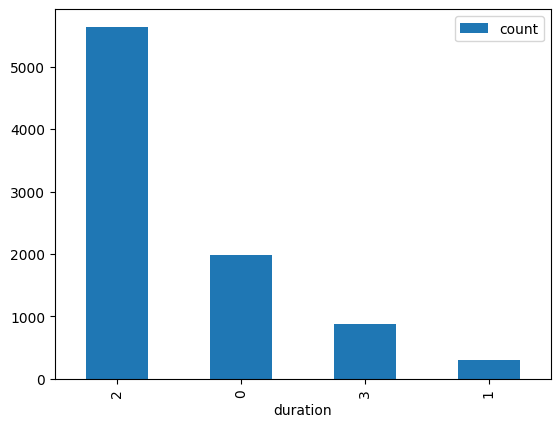

In [486]:
netflix['duration'].value_counts().reset_index().plot(kind='bar',x='duration', y='count')
#1hr to 5 hr shows/movies are large in no in this dataset followed by 30 mins shorter ones

In [487]:
netflix.drop(columns=['description'],inplace=True)

In [488]:
netflix['listed_in'].unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [489]:
def categorize_genre(genre):
    categories = {
        'Documentaries': ['Documentaries', 'Docuseries'],
        'International': ['International TV Shows', 'International Movies'],
        'Crime/Thriller': ['Crime TV Shows', 'TV Mysteries', 'TV Thrillers', 'Thrillers'],
        'Drama': ['TV Dramas', 'Dramas'],
        'Comedy': ['TV Comedies', 'Comedies'],
        'Action/Adventure': ['TV Action & Adventure', 'Action & Adventure'],
        'Sci-Fi/Fantasy': ['TV Sci-Fi & Fantasy', 'Sci-Fi & Fantasy'],
        'Children/Family': ["Kids' TV", 'Children & Family Movies'],
        'Horror': ['TV Horror', 'Horror Movies'],
        'Romance': ['Romantic TV Shows', 'Romantic Movies']
    }
    for key,values in categories.items():
        if any(value in genre for value in values):
            return key
    return 'other'
netflix['Genre']=netflix['listed_in'].map(categorize_genre)

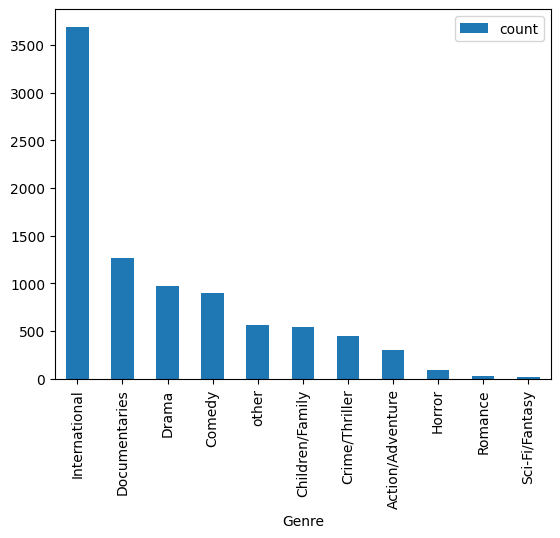

In [490]:
netflix['Genre'].value_counts().reset_index().plot(kind='bar',x='Genre',y='count')
plt.show() #internationals tvshows and movies are large in number

In [491]:
netflix.drop(columns=['listed_in'],inplace=True)

In [492]:
netflix['director'].value_counts().nlargest(15)


director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Yılmaz Erdoğan             8
Lance Bangs                8
Kunle Afolayan             8
Name: count, dtype: int64

In [493]:
netflix['cast'].value_counts().nlargest(15)

cast
David Attenborough                                                                                                        19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                   14
Samuel West                                                                                                               10
Jeff Dunham                                                                                                                7
David Spade, London Hughes, Fortune Feimster                                                                               6
Kevin Hart                                                                                                                 6
Craig Sechler                                                                                                              6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath  

In [494]:
netflix.duplicated().sum()

0

## Bivariate

In [495]:
topdirector_df=netflix.groupby(['director','type']).size().nlargest(15).reset_index() #all the top directors produced movies

In [496]:
topdirector_df

,director,type,0
0,Rajiv Chilaka,Movie,19
1,"Raúl Campos, Jan Suter",Movie,18
2,Suhas Kadav,Movie,16
3,Marcus Raboy,Movie,15
4,Jay Karas,Movie,14
5,Cathy Garcia-Molina,Movie,13
6,Jay Chapman,Movie,12
7,Martin Scorsese,Movie,12
8,Youssef Chahine,Movie,12
9,Steven Spielberg,Movie,11


In [497]:
topdirector_list=topdirector_df['director'].to_list()

In [498]:
data=netflix[netflix['director'].isin(topdirector_list)][['director','title']].reset_index()

In [499]:
data.drop(columns='index',inplace=True)

In [500]:
director_titles = data.groupby('director')['title'].apply(list).reset_index()

# Print the result
print(director_titles)

                  director                                              title
0      Cathy Garcia-Molina  [Hello, Love, Goodbye, Unexpectedly Yours, My ...
1             David Dhawan  [Kyo Kii... Main Jhuth Nahin Bolta, Chashme Ba...
2         Don Michael Paul  [Company of Heroes, Sniper: Legacy, Sniper: Gh...
3          Fernando Ayllón  [Ni de coña, Death Can Wait, Holy Expectations...
4              Hakan Algül  [Deliha, Niyazi Gül Dörtnala, Night of Knots, ...
5              Jay Chapman  [D.L. Hughley: Contrarian, Moshe Kasher: Live ...
6                Jay Karas  [The Main Event, Adam Devine: Best Time of Our...
7               Johnnie To  [Blind Detective, Don't Go Breaking My Heart, ...
8             Marcus Raboy  [Patton Oswalt: I Love Everything, Taylor Toml...
9          Martin Scorsese  [Shutter Island, No Direction Home: Bob Dylan,...
10           Rajiv Chilaka  [Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...
11  Raúl Campos, Jan Suter  [Coco y Raulito: Carrusel de ternura

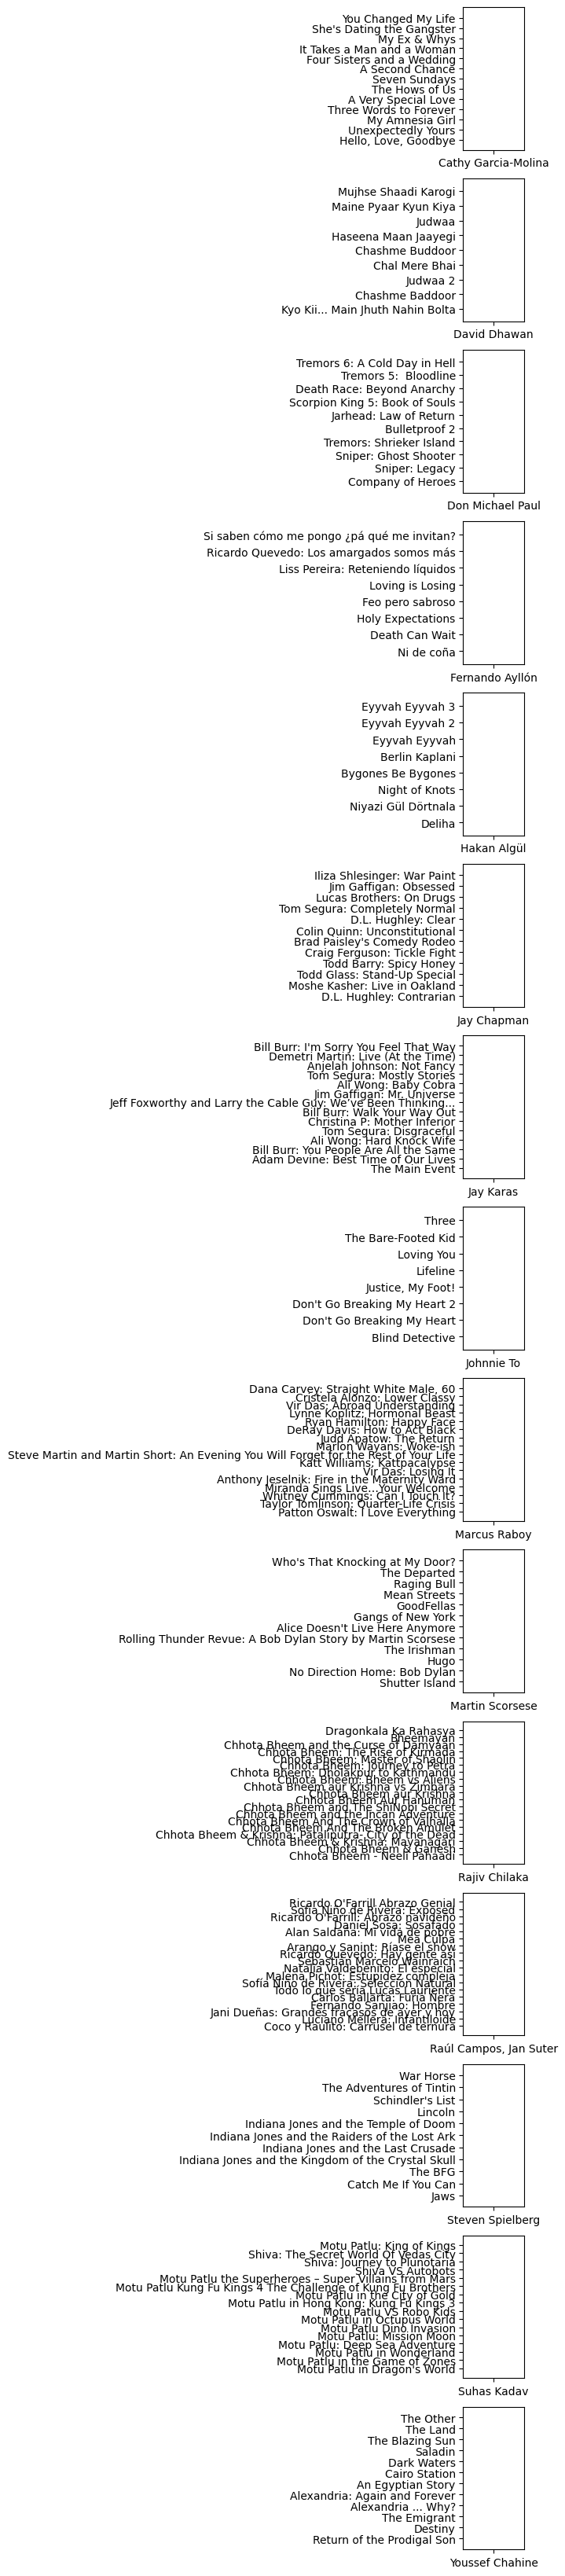

In [501]:
fig,ax=plt.subplots(15,1,figsize=(1,42))
ax=ax.flatten()
for i, row in director_titles.iterrows():
    director = row['director']
    titles = row['title']
    ax[i].barh(titles,director)
plt.show()
        

In [502]:
netflix[netflix['type'] == 'TV Show'].groupby('director').size().nlargest(10) #by most tv show by directors are limited to 3

director
Alastair Fothergill          3
Hsu Fu-chun                  2
Iginio Straffi               2
Ken Burns                    2
Rob Seidenglanz              2
Shin Won-ho                  2
Stan Lathan                  2
Adrien Lagier, Ousmane Ly    1
Adrián García Bogliano       1
Ah Loong                     1
dtype: int64

In [503]:
netflix.groupby(['director','country'])['director'].size().nlargest(15)

director                country      
Marcus Raboy            United States    15
Jay Karas               United States    14
Cathy Garcia-Molina     Philippines      13
Jay Chapman             United States    12
David Dhawan            India             9
Raúl Campos, Jan Suter  Mexico            9
Hakan Algül             Turkey            8
Martin Scorsese         United States     8
Ryan Polito             United States     8
Shannon Hartman         United States     8
Troy Miller             United States     8
Yılmaz Erdoğan          Turkey            8
Kunle Afolayan          Nigeria           7
Lance Bangs             United States     7
Ram Gopal Varma         India             7
Name: director, dtype: int64

In [504]:
dic = {}

for director in netflix['director'].unique():   
    # Filter the DataFrame for rows where the director matches and the country is not null
    director_df = netflix[(netflix['director'] == director) & (~netflix['country'].isnull())]
    if not director_df.empty:
        country = director_df['country'].mode()[0]
        dic[director] = country
   


        

In [505]:
dic

{'Kirsten Johnson': 'United States',
 'Julien Leclercq': 'France',
 'Mike Flanagan': 'United States',
 'Haile Gerima': 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
 'Andy Devonshire': 'United Kingdom',
 'Theodore Melfi': 'United States',
 'Christian Schwochow': 'Germany, Czech Republic',
 'Bruno Garotti': 'Brazil',
 'Olivier Megaton': 'United States',
 'Alex Woo, Stanley Moore': 'United States',
 'S. Shankar': 'India',
 'Rajiv Menon': 'India',
 'Dennis Dugan': 'United States',
 'Scott Stewart': 'United States',
 'Robert Luketic': 'United States',
 'George Nolfi': 'China, Canada, United States',
 'Steven Spielberg': 'United States',
 'Jeannot Szwarc': 'United States',
 'Joe Alves': 'United States',
 'Joseph Sargent': 'United States',
 'Daniel Espinosa': 'South Africa, United States, Japan',
 'Bunmi Ajakaiye': 'South Africa',
 'Antoine Fuqua': 'United States',
 'Toshiya Shinohara': 'Japan',
 'Masahiko Murata': 'Japan',
 'Hajime Kamegaki': 'Japan',
 'Hirotsugu 

In [506]:
netflix['country'] = netflix['country'].fillna(netflix['director'].map(dic))

In [507]:
netflix['rating']=netflix['rating'].fillna(netflix['rating'].mode()[0])

In [508]:
netflix.isnull().sum()

type                 0
title                0
director          2634
cast               825
country            683
release_year         0
rating               0
duration             0
binned_release       0
year_added           0
Genre                0
dtype: int64

In [509]:
netflix.drop(columns='cast',inplace=True)

In [510]:
netflix.drop(columns='release_year',inplace=True)

In [511]:
netflix.head()

,type,title,director,country,rating,duration,binned_release,year_added,Genre
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,PG-13,2,2020s,2021,Documentaries
1,TV Show,Blood & Water,NaN,South Africa,TV-MA,3,2020s,2021,International
2,TV Show,Ganglands,Julien Leclercq,France,TV-MA,0,2020s,2021,International
3,TV Show,Jailbirds New Orleans,NaN,NaN,TV-MA,0,2020s,2021,Documentaries
4,TV Show,Kota Factory,NaN,India,TV-MA,3,2020s,2021,International


In [512]:
moviedata=netflix[netflix['type']=='Movie']

In [513]:
movie=moviedata.groupby('country').size().nlargest(10).reset_index().rename(columns={0:'count'})

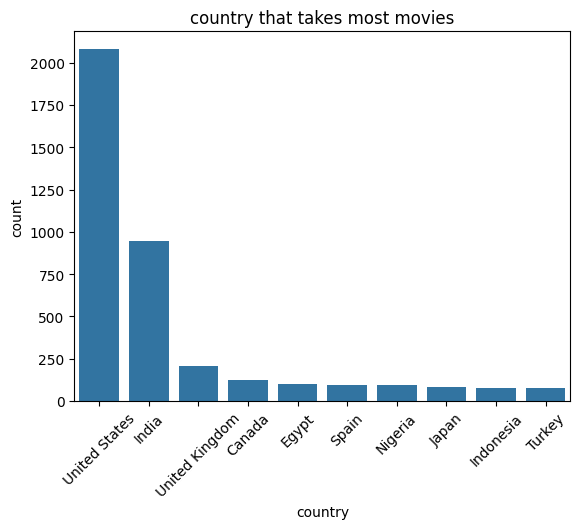

In [514]:
sns.barplot(x='country',y='count',data=movie)
plt.title('country that takes most movies')
plt.tick_params(axis='x',rotation=45)
plt.show()

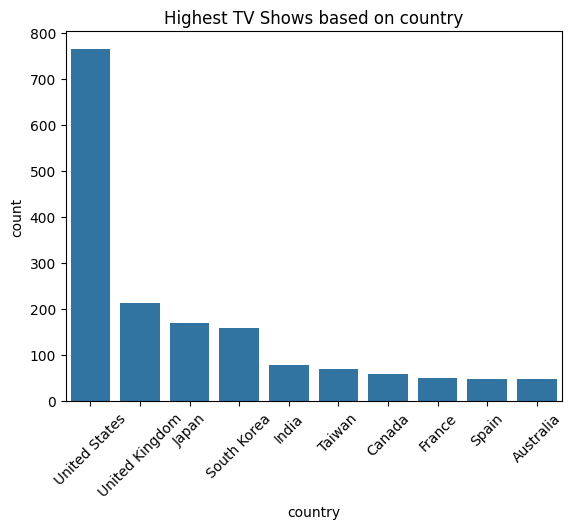

In [515]:
showdata=netflix[netflix['type']=='TV Show']
show=showdata.groupby('country').size().nlargest(10).reset_index().rename(columns={0:'count'})
sns.barplot(x='country',y='count',data=show)
plt.title('Highest TV Shows based on country')
plt.tick_params(axis='x',rotation=45)
plt.show()

In [516]:
netflix.groupby(['type','country','director'])['director'].size().nlargest(10)

type   country        director              
Movie  India          Rajiv Chilaka             19
                      Suhas Kadav               16
       United States  Marcus Raboy              15
                      Jay Karas                 14
       Philippines    Cathy Garcia-Molina       13
       United States  Jay Chapman               12
       India          David Dhawan               9
       Mexico         Raúl Campos, Jan Suter     9
       Nigeria        Kunle Afolayan             8
       Turkey         Hakan Algül                8
Name: director, dtype: int64

In [517]:
netflix.groupby(['type','Genre','director'])['Genre'].size().nlargest(10) #genre with children n international has most production by directors

type   Genre            director              
Movie  Children/Family  Rajiv Chilaka             19
       other            Raúl Campos, Jan Suter    18
                        Marcus Raboy              15
       International    Cathy Garcia-Molina       13
       other            Jay Karas                 13
                        Jay Chapman               12
       International    Youssef Chahine           10
       Children/Family  Suhas Kadav                8
       Comedy           Suhas Kadav                8
       Drama            Martin Scorsese            8
Name: Genre, dtype: int64

In [518]:
year_duration = showdata.groupby(['binned_release','year_added'])['duration'].size()

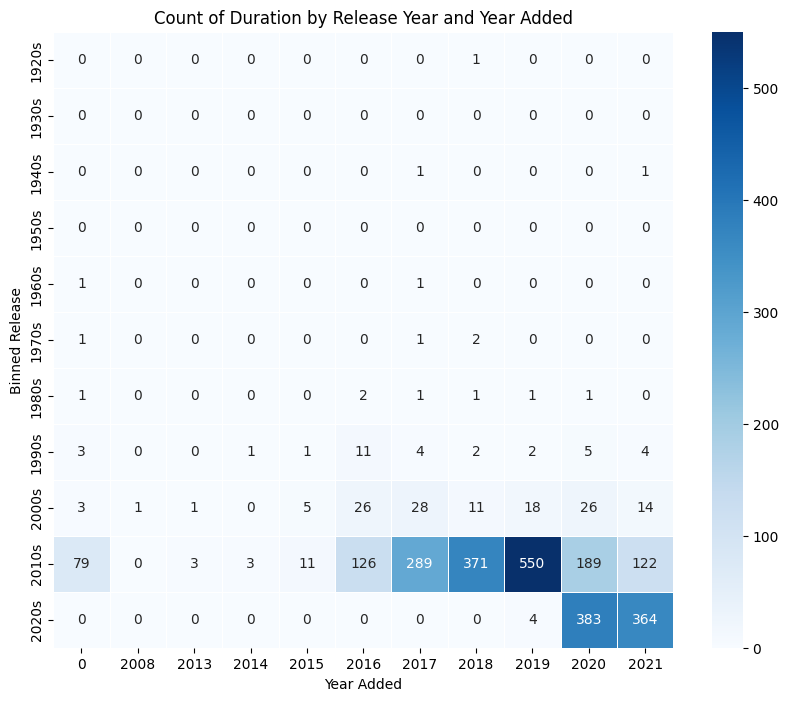

In [519]:
heatmap_data = showdata.pivot_table(index='binned_release', columns='year_added', values='duration', aggfunc='size')


plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='g', linewidths=.5)
plt.title('Count of Duration by Release Year and Year Added')
plt.xlabel('Year Added')
plt.ylabel('Binned Release')
plt.show()

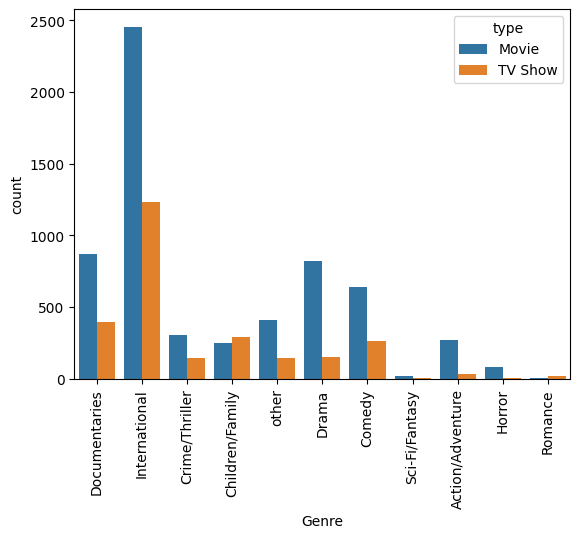

In [520]:
sns.countplot(x='Genre',hue='type',data=netflix)
plt.tick_params(axis='x',rotation=90)
plt.show()

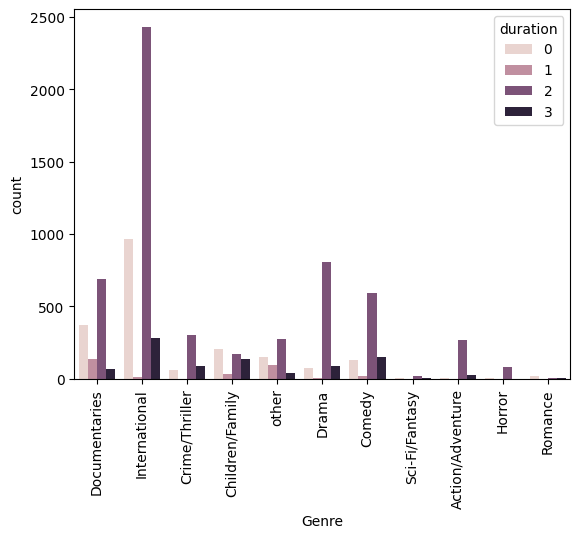

In [521]:
sns.countplot(x='Genre',hue='duration',data=netflix)
plt.tick_params(axis='x',rotation=90)
plt.show()

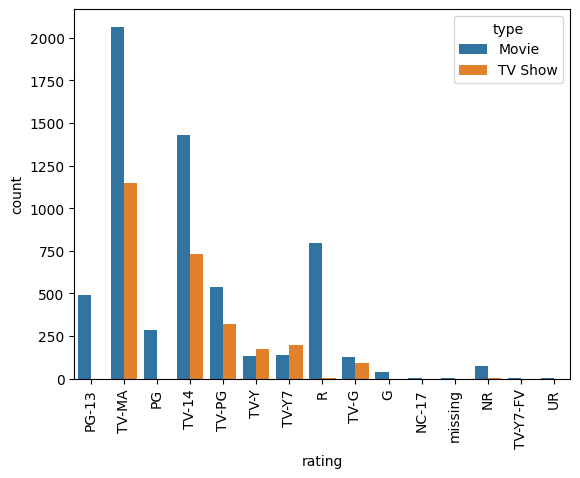

In [522]:
sns.countplot(x='rating',hue='type',data=netflix)
plt.tick_params(axis='x',rotation=90)
plt.show() #younger population has more tv shows whereas adults have more movies to watch , little fewer tv shows

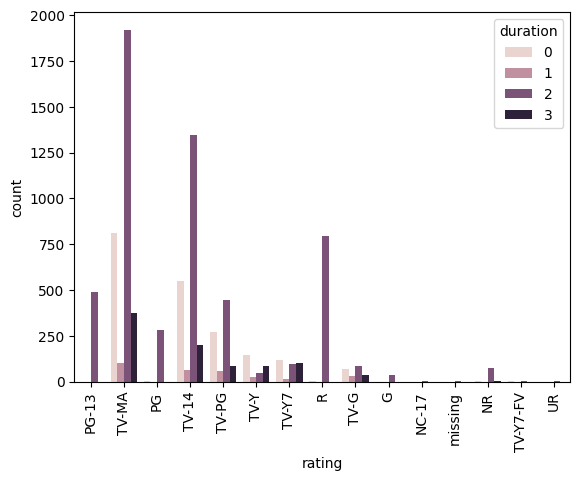

In [523]:
sns.countplot(x='rating',hue='duration',data=netflix)
plt.tick_params(axis='x',rotation=90)
plt.show()

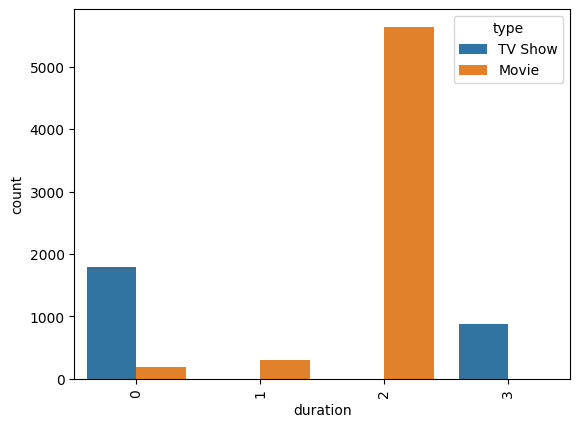

In [524]:
sns.countplot(x='duration',hue='type',data=netflix)
plt.tick_params(axis='x',rotation=90)
plt.show()

In [525]:
# 30 mins to 5 hr are generally movies 
# less than 30 mins and more than 5 hours have TV Shows
#Certain ratings like Restricted and ParentG 13 have only movies

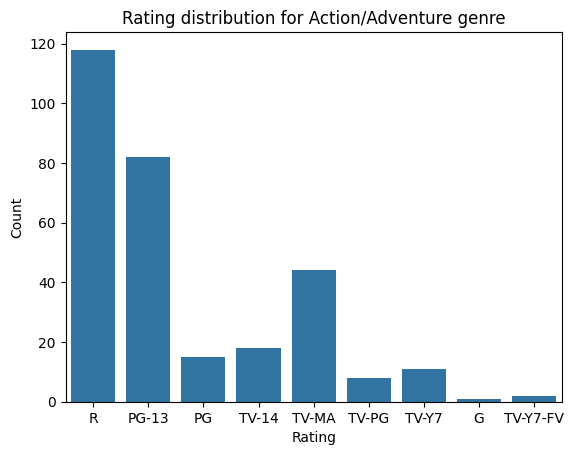

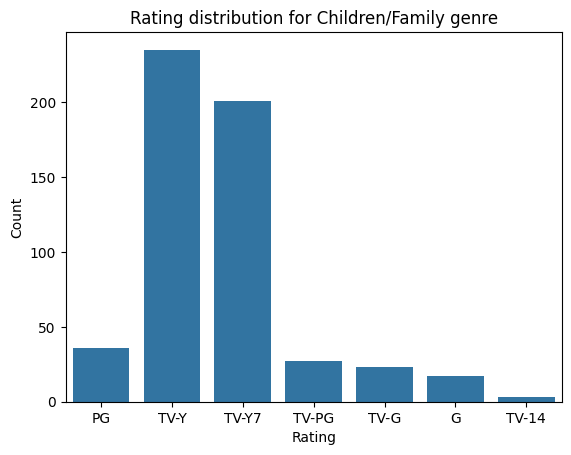

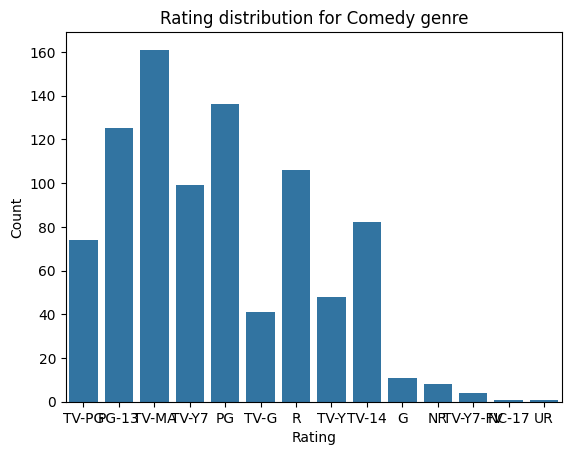

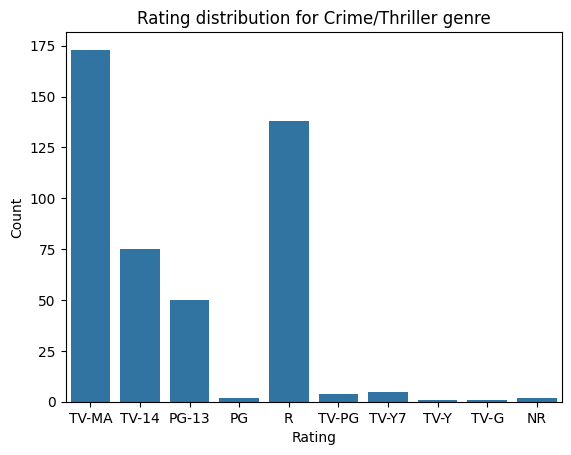

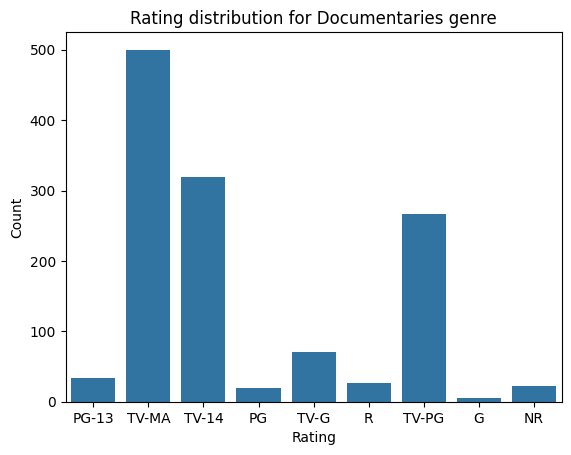

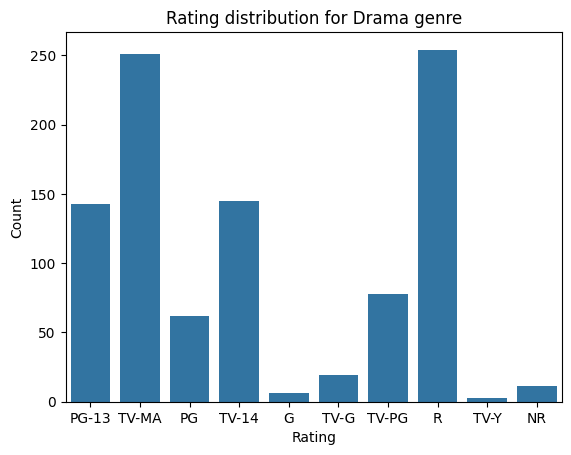

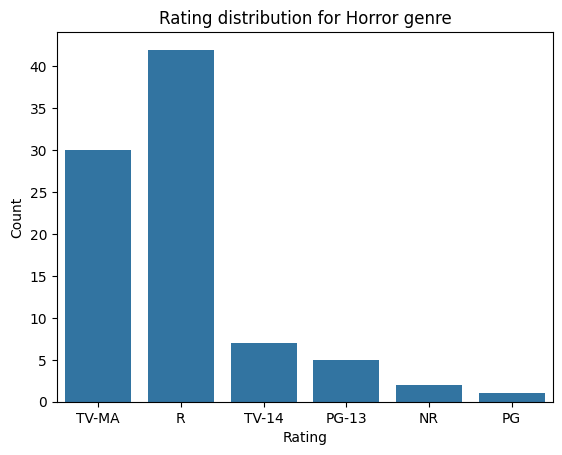

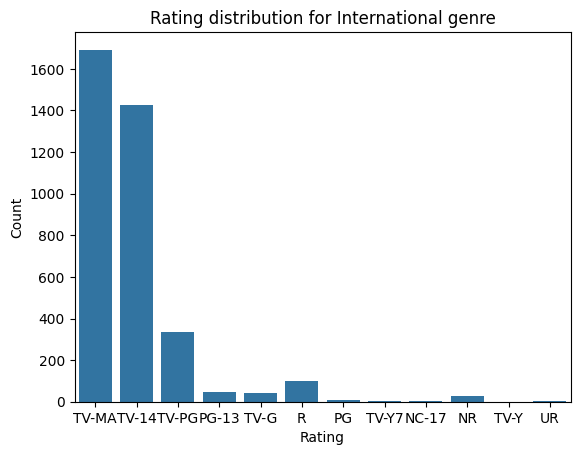

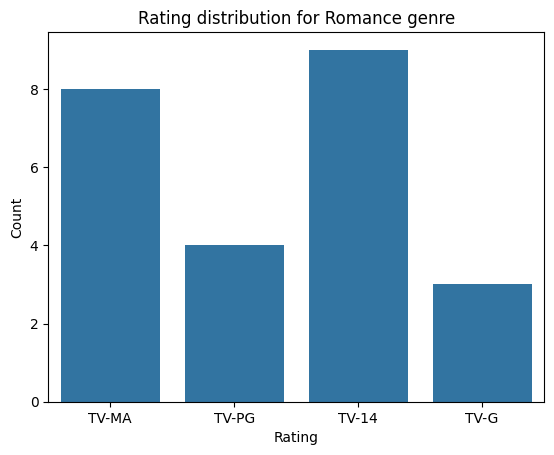

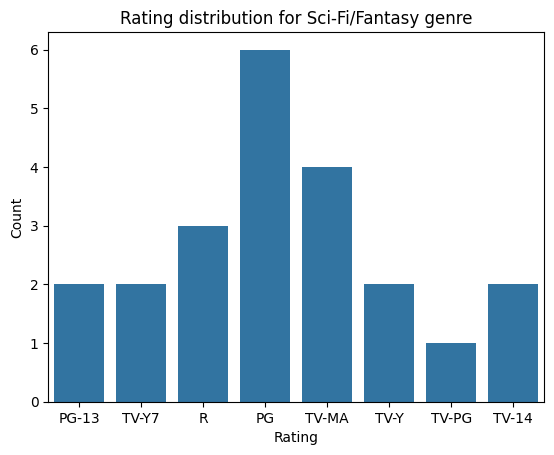

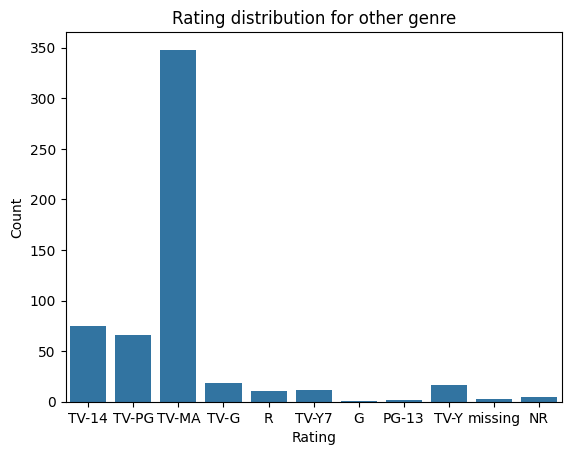

In [526]:
grouped_data = netflix.groupby('Genre')

for genre, gendata in grouped_data:
    sns.countplot(x='rating', data=gendata)
    plt.title(f'Rating distribution for {genre} genre')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.show()

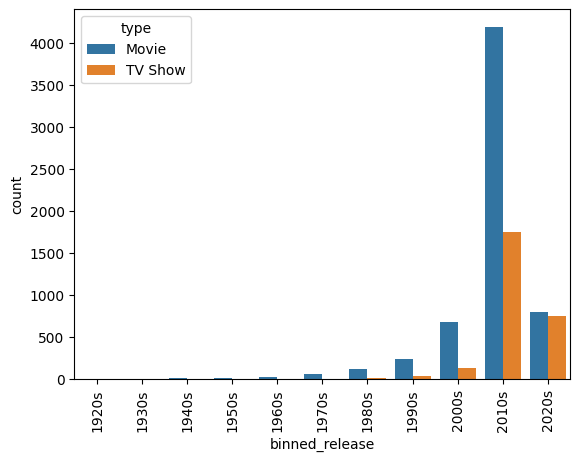

In [527]:
sns.countplot(x='binned_release',hue='type',data=netflix)
plt.tick_params(axis='x',rotation=90)
plt.show()

In [528]:
netflix['director'].fillna('Unknown',inplace=True)

In [529]:
netflix['country'].fillna('Unknown',inplace=True)

In [530]:
netflix.isnull().sum()

type              0
title             0
director          0
country           0
rating            0
duration          0
binned_release    0
year_added        0
Genre             0
dtype: int64

In [531]:
netflix.head()

,type,title,director,country,rating,duration,binned_release,year_added,Genre
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,PG-13,2,2020s,2021,Documentaries
1,TV Show,Blood & Water,Unknown,South Africa,TV-MA,3,2020s,2021,International
2,TV Show,Ganglands,Julien Leclercq,France,TV-MA,0,2020s,2021,International
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,TV-MA,0,2020s,2021,Documentaries
4,TV Show,Kota Factory,Unknown,India,TV-MA,3,2020s,2021,International


In [532]:
col=['type','title','director','country','rating','Genre','binned_release','year_added']
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for columns in netflix[col]:
    netflix[columns]=encoder.fit_transform(netflix[columns])

In [533]:
netflix.head()

,type,title,director,country,rating,duration,binned_release,year_added,Genre
0,0,1975,2295,603,4,2,9,14,4
1,1,1091,4303,426,8,3,9,14,7
2,1,2651,2105,162,8,0,9,14,7
3,1,3506,4303,736,8,0,9,14,4
4,1,3861,4303,251,8,3,9,14,7


In [534]:
columns_needed=list(netflix.columns.drop('type'))+['type']
netflix=netflix.reindex(columns=columns_needed)

In [535]:
X=netflix.iloc[:,:-1].values
y=netflix.iloc[:,-1].values

In [536]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.metrics import accuracy_score,classification_report

In [537]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [538]:
models={
    'Logistic Regression': LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'SVM':SVC(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
}

In [539]:
for model_name,model in models.items():
    print(f"Model {model_name}...")
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"Accuracy of {model_name}: {accuracy:.3f}")
    print(classification_report(y_test,y_pred))
    print("======================================================================")

Model Logistic Regression...
Accuracy of Logistic Regression: 0.866
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1248
           1       0.78      0.75      0.77       514

    accuracy                           0.87      1762
   macro avg       0.84      0.83      0.84      1762
weighted avg       0.86      0.87      0.87      1762

Model KNN...
Accuracy of KNN: 0.979
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1248
           1       0.96      0.97      0.96       514

    accuracy                           0.98      1762
   macro avg       0.97      0.98      0.97      1762
weighted avg       0.98      0.98      0.98      1762

Model SVM...
Accuracy of SVM: 0.985
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1248
           1       0.96      0.99      0.98       514

    accuracy                           0.9